## Homework 3, Problem 3 on inhomogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2022, Prof. J.C. Kao, TAs T. Monsoor, W. Yu.


 In this problem, we will use the same simulated neuron as in
  Problem 2, but now the reaching angle $s$ will be time-dependent
  with the following form:
$$ s(t) = t^2 \cdot \pi,$$

where $t$ ranges between 0 and 1 second. This will be refered as *s(t)* equation in the questions.


In [43]:
"""
ECE C143/C243 Homework-3 Problem-3

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special
from scipy.stats import poisson

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (6 points) Spike trains
Generate 100 spike trains, each 1 second in duration, according to
an inhomogeneous Poisson process with a firing rate profile defined
by tuning equation, $$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$ 
and the $s(t)$ equation, $$ s(t) = t^2 \cdot \pi$$

In [77]:
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 # trial length (ms)

In [78]:
np.random.exponential(1.0/r_max * 1000)

42.49120788564585

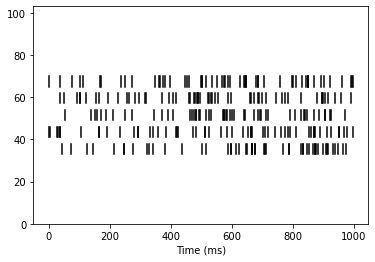

In [116]:
## 3a
num_trials = 100 # number of total spike trains
num_rasters_to_plot = 5 # number of spike trains to plot
#====================================================#
# YOUR CODE HERE:
#   Generate the spike times for 100 trials of an inhomogeneous
#   Poisson process.  Plot 5 example spike rasters.
#====================================================#
spike_times = np.empty((num_trials), dtype=list)

for trial in range(num_trials):
    #generate a homogeneous possion process
    spike_train=list(nsp.GeneratePoissonSpikeTrain( T, r_max ))
    #thin it
    spikes_to_keep=[]
    for t in spike_train:
        s=(t/1000)**2*np.pi
        l=r_0+(r_max-r_0)*np.cos(s-s_max)
        p=l/r_max
        if np.random.random()<p:
            spikes_to_keep.append(t)
    spike_times[trial]=np.array(spikes_to_keep)
nsp.PlotSpikeRaster(spike_times[:num_rasters_to_plot])
    

#====================================================#
# END YOUR CODE
#====================================================#


### (b) (5 points) Spike histogram
  Plot the spike histogram by taking spike counts in non-overlapping
  20 ms bins, then averaging across the 100 trials.  The spike
  histogram should have firing rate (in spikes / second) as the
  vertical axis and time (in msec, not time bin index) as the
  horizontal axis. Plot the expected firing rate profile defined by equations
 tuning equation and *s(t)* equation on the same plot. 

Text(0.5, 0, 'Time(ms)')

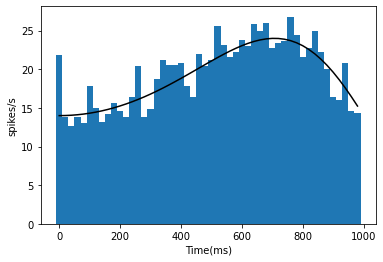

In [118]:
# 3b
bin_width = 20 # (ms)
#====================================================#
# YOUR CODE HERE:
#   Plot the spike histogram
#====================================================#
bins=np.arange(0,1000//bin_width)*bin_width
counts=np.zeros(1000//bin_width)
for rep in range(num_trials):
    rbins,rcounts=np.unique(spike_times[rep][0:]//bin_width,return_counts=True)
    for i,b in enumerate(rbins):
        counts[int(b)]+=rcounts[i]
plt.bar(bins,(counts/num_trials)/(50*10**-3),width=20)
s=(bins/1000)**2*np.pi
l=r_0+(r_max-r_0)*np.cos(s-s_max)
plt.plot(bins,l*2/5,color="black")
#====================================================#
# END YOUR CODE
#====================================================#

plt.ylabel('spikes/s')
plt.xlabel('Time(ms)')

#### Question:
Does the spike histogram agree with the expected firing rate profile?

#### Your Answer:
Yes

### (c) (6 points) Count distribution
  For each trial, count the number of spikes across the entire trial.
  Plot the normalized distribution of spike counts.  Fit a Poisson
  distribution to this empirical distribution and plot it on top of
  the empirical distribution.  

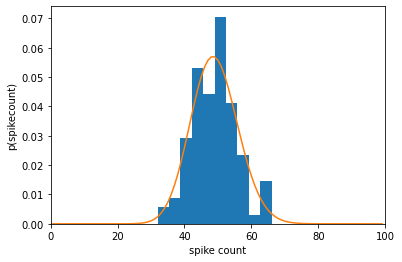

In [101]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of spike counts
#====================================================#
N_spikes=np.empty(num_trials)
for trial in range(num_trials):
    N_spikes[trial]=spike_times[trial].shape[0]

plt.hist(N_spikes,density=True)
plt.xlim(0,100)
plt.plot(np.arange(0,100),poisson.pmf(np.arange(0,100), np.mean(N_spikes)))
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('spike count')
plt.ylabel('p(spikecount)')
plt.show()

#### Question:
Should we expect the spike counts to be Poisson-distributed?

#### Your Answer:
Yes, because the spike counts of a inhomogeneous Possion process is still a possion distribution.

### (d) (5 points) ISI distribution
  Plot the normalized distribution of ISIs.  Fit an exponential
  distribution to the empirical distribution and plot it on top of the
  empirical distribution. 

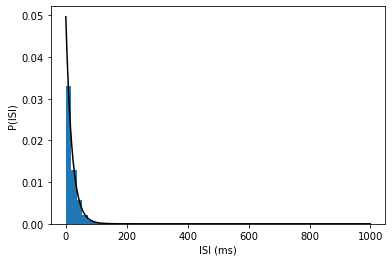

In [122]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of ISIs
#====================================================#
ISI=[]
for trial in range(num_trials):
    ISI+=list(spike_times[trial][1:]-spike_times[trial][:-1])
plt.hist(ISI,density=True)
l=1/np.mean(ISI)
plt.plot(np.arange(0,T),l*np.exp(-l*np.arange(0,T)),"black")
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('ISI (ms)')
plt.ylabel('P(ISI)')
plt.show()

#### Question: 
Should we expect the ISIs to be exponentially-distributed?
(Note, it is possible for the  empirical distribution to strongly resemble an exponential distribution even if the data aren't exponentially distributed.)

#### Your Answer:
No